Alex Fortes Pereira 201910445


##Carregando Dependências

Bibliotecas necessárias usadas neste exemplo: numpy, pandas, cv2, skimage, PIL, matplotlib

Numpy é uma biblioteca de manipulação de array, usada para álgebra linear, transformação de Fourier e capacidades de números aleatórios.

Pandas é uma biblioteca para manipulação e análise de dados.

CV2 é uma biblioteca para tarefas de visão computacional.

Skimage é uma biblioteca que oferece suporte a aplicativos de processamento de imagem em python.

Matplotlib é uma biblioteca que gera figuras e fornece um kit de ferramentas de interface gráfica com o usuário.



In [1]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import scipy

# !wget --no-check-certificate \
#     https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
#     -O common.py

Passo 2: Ler a imagem de alguma url:

> Nesta etapa, vamos ler imagens de urls e exibi-las usando openCV.

Os canais de cores de entrada padrão estão no formato BGR ou RGB para openCV.

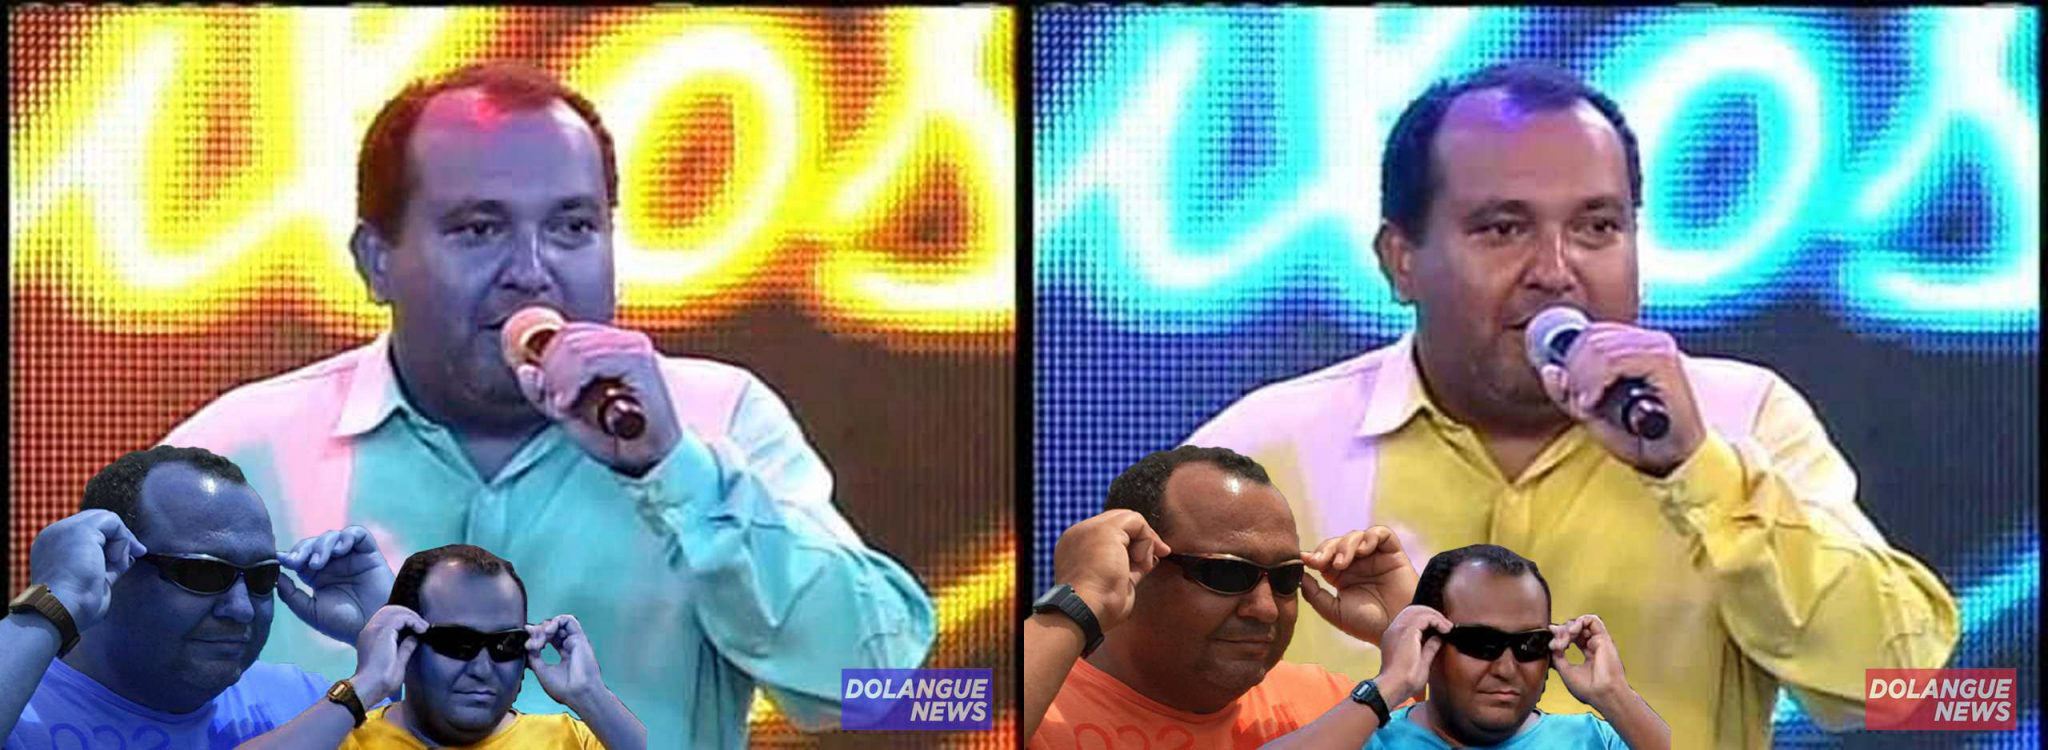

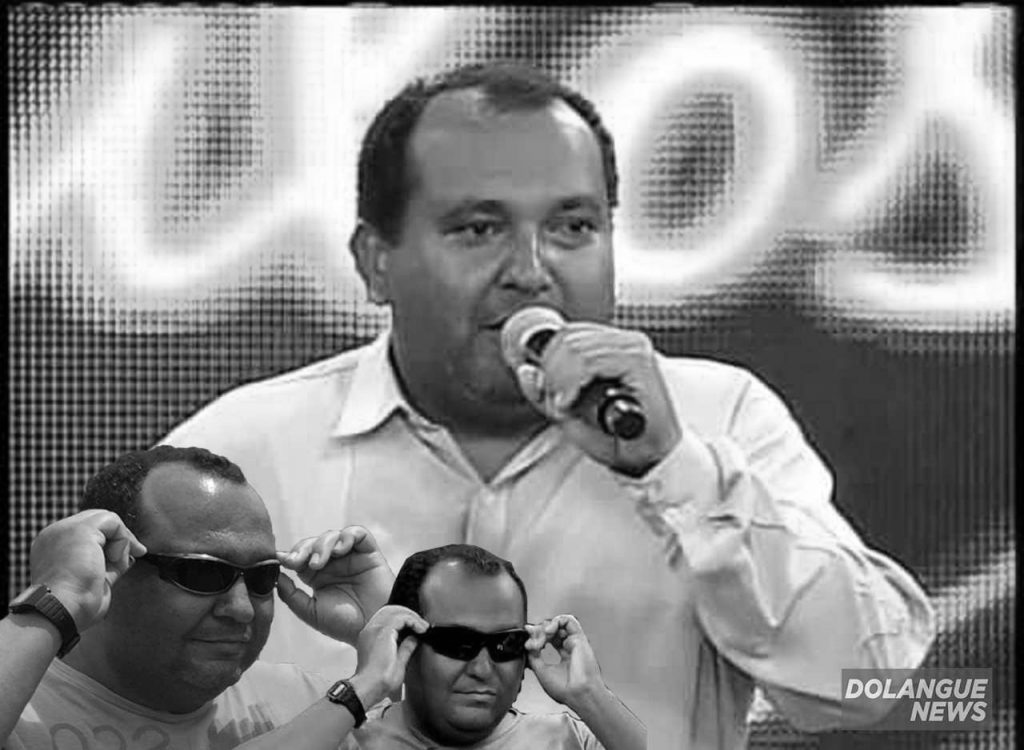

In [50]:
# Criando uma lista de 3 urls de imagem que vamos ler posteriormente:
urls = ["https://dolanguenews.com.br/wp-content/uploads/2020/08/ednaldo-pereiro-presidente_Easy-Resize.com_-1024x750.jpg"]

# Lendo e mostrando cada imagem da lista em BGR e RGB:
for url in urls:
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  
  final_frame = cv.hconcat((image, image_2)) 
  cv2_imshow(final_frame)

  print('\n')

  image_2_PB = cv.cvtColor( image_2, cv.COLOR_BGR2GRAY)
  cv2_imshow(image_2_PB)




Passo 3: detectores de objetos em retângulo:

Usando alguns detectores de objetos que já foram treinados (domínio público) e podem ser utilizados para detecção de vários tipos de objetos no OpenCV. Uma lista de detectores para vários tipos de objetos está disponível no github do openCV em:

Detectores Haar, assim como outras técnicas de visão computacional, são algoritmos que pode ser treinados para detectar tipos de objetos que possuem características em comum. Por exemplo faces humanas. 

É uma característica comum que entre todas as faces a região dos olhos é mais escura do que a região das bochechas. Portanto, uma característica Haar comum para a detecção de face é um conjunto de dois retângulos adjacentes que ficam na região dos olhos e acima da região das bochechas. A posição desses retângulos é definida em relação a uma janela de detecção que age como uma caixa delimitadora para o objeto alvo.



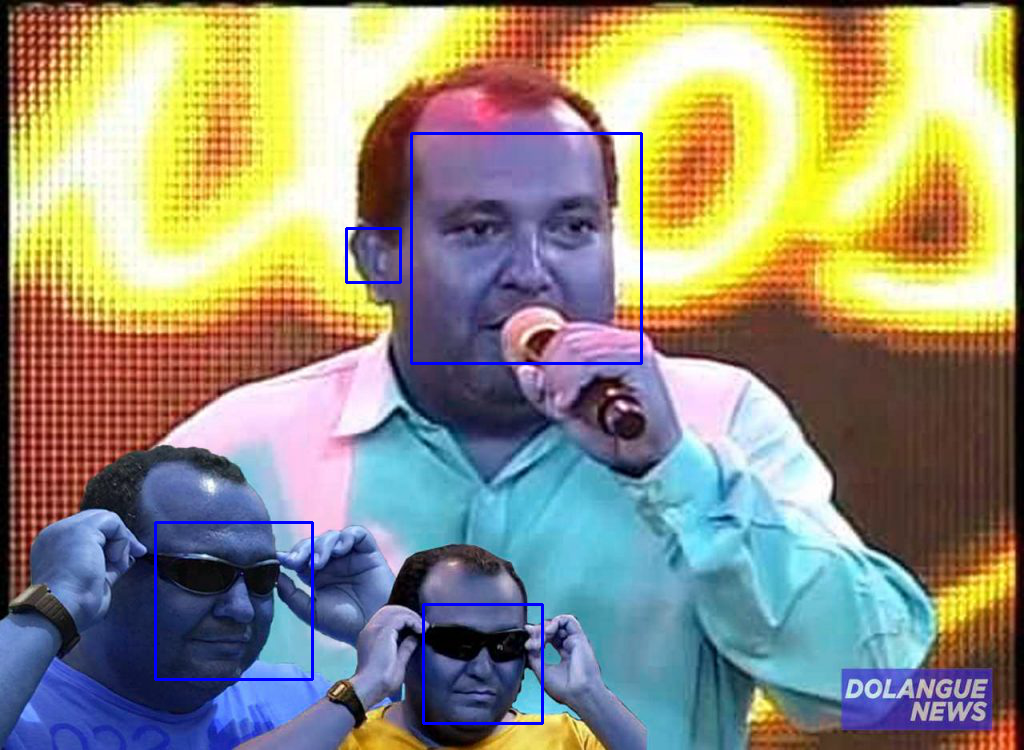

In [51]:

#this is a pre-trained face cascade
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

# faces = face_cascade.detectMultiScale(image_2_PB, 1.3, 5)


#Executa a detecção das faces:
faces = face_cascade.detectMultiScale(image, scaleFactor = 1.05, minNeighbors = 7, minSize = (30,30), flags = cv.CASCADE_SCALE_IMAGE)

# Desenha retangulos na iamgem original (colorida) para cada face encontrada:
for (x,y,w,h) in faces:
     cv.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)

cv2_imshow(image)


Passo 4: detectores de objetos em círculo:

Da mesma forma que o passo 3 usando alguns detectores de objetos que já foram treinados com a mesma característica comum que entre todas as faces a região dos olhos sendo escura do que a região das bochechas. Porem usando um círculo 
para a detecção da face. A posição desses círculo é definida em relação a uma janela de detecção que age como uma caixa delimitadora.



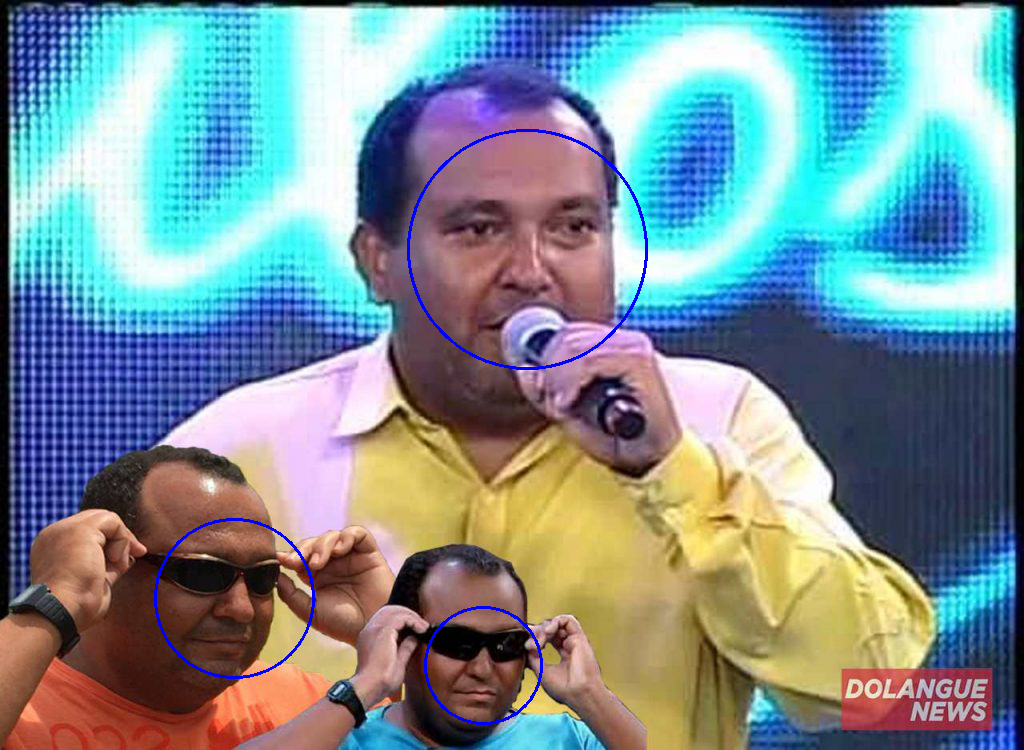

In [52]:
#this is a pre-trained face cascade
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

# faces = face_cascade.detectMultiScale(image_2_PB, 1.3, 5)

#Executa a detecção das faces:
faces = face_cascade.detectMultiScale(image_2_PB, scaleFactor = 1.05, minNeighbors = 7, minSize = (30,30), flags = cv.CASCADE_SCALE_IMAGE)

# Desenha retangulos na iamgem original (colorida) para cada face encontrada:
for (x,y,w,h) in faces:
     x = int((x+w/2))
     y = int((y+h/2))
     raio = int((w)/2)
     cv.circle(image_3,(x,y),raio,(255,0,0),2)

cv2_imshow(image_3)
